In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
%cd ..

/home/bnrc2/mu/tf-posegan


In [ ]:
from dataGenerator.datagen_v3 import DataGenerator

In [ ]:
img_dir = '/media/bnrc2/_backup/ai/ai_challenger_keypoint_train_20170902/keypoint_train_images_20170902/'
txt="./data_mini.txt"
joints = ["rShoulder", "rElbow", "rWrist", "lShoulder", "lElbow", "lWrist", "rhip","rknee","rankle",
                       "lhip","lknee","lankle","head","neck"]

In [5]:
datagen = DataGenerator(imgdir=img_dir,txt=txt,is_aug=False,batch_size=8,joints_name=joints)

READING TRAIN DATA
SET CREATED
--Training set : 14114  samples.


In [6]:
generator = datagen.get_batch_generator()

In [7]:
train_img, train_gtmap, train_weights,train_name,train_center,train_scale= next(generator)

In [8]:
img = train_img[0]

In [9]:
train_name[0]

'17ab2efac1b9cac452c05a89b436ef66309095d9.jpg'

In [26]:
ori_img = cv2.imread("/media/bnrc2/_backup/ai/ai_challenger_keypoint_train_20170902/keypoint_train_images_20170902/"+str(train_name[0]))

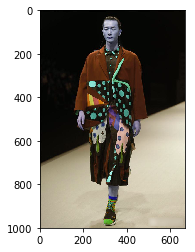

In [27]:
plt.imshow(ori_img)

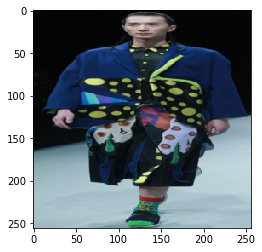

In [28]:
plt.imshow(img)

In [29]:
ht = train_gtmap[0]

In [30]:
ht.shape

(64, 64, 14)

In [31]:
idx = []
for i in range(14):
    index = np.unravel_index(ht[:, :, i].argmax(), [64,64])
    idx.append((index[1]*4,index[0]*4,)   )

In [32]:
idx

[(72, 48),
 (44, 84),
 (32, 112),
 (196, 52),
 (220, 88),
 (220, 120),
 (92, 116),
 (104, 180),
 (128, 204),
 (164, 116),
 (144, 172),
 (136, 224),
 (132, 4),
 (132, 36)]

In [33]:
img_cp = img.copy()

for i in range(14):
    cv2.circle(img_cp, (int(idx[i][0]), int(idx[i][1])), 10, (0, 255, 155), -1)



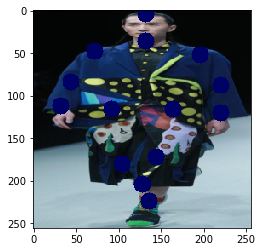

In [34]:
plt.imshow(img_cp)

In [35]:
reverse = datagen.recoverFromHm(train_gtmap,center=train_center,scale=train_scale)

In [36]:
reverse[0]

array([[239, 202],
       [200, 338],
       [183, 444],
       [414, 217],
       [448, 354],
       [448, 475],
       [267, 460],
       [284, 702],
       [318, 793],
       [369, 460],
       [341, 672],
       [329, 868],
       [324,  36],
       [324, 157]])

In [37]:
img_cp2 = ori_img.copy()

for i in range(14):
    cv2.circle(img_cp2, (int(reverse[0][i][0]), int(reverse[0][i][1])), 10, (0, 255, 155), -1)

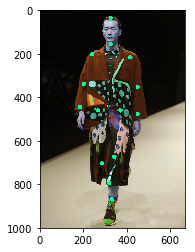

In [38]:
plt.imshow(img_cp2)

In [23]:
a = [1,2,3,4]
print(a[::-1])

[4, 3, 2, 1]
